----
##### The simply only convex + regularizer (Example: longtitude-latitude attributes of Cal. housing)

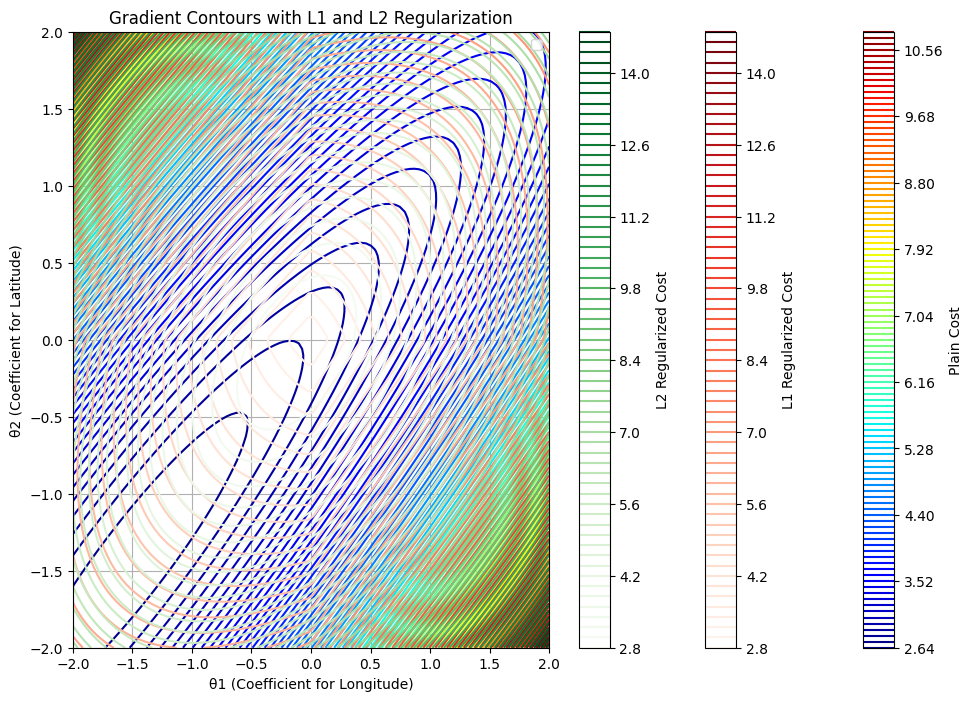

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, [6, 7]]  # Longtitude-Latitude
y = california_housing.target

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cost functions with L1 and L2 regularization
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X @ theta
    return np.sum((predictions - y) ** 2) / (2 * m)

def compute_cost_L1(theta, X, y, lambda_):
    return compute_cost(theta, X, y) + lambda_ * np.sum(np.abs(theta))

def compute_cost_L2(theta, X, y, lambda_):
    return compute_cost(theta, X, y) + (lambda_ / 2) * np.sum(theta ** 2)

# Parameters for plotting
theta_vals = np.linspace(-2, 2, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_vals, theta_vals)
cost_grid_plain = np.zeros_like(theta_1_grid)
cost_grid_L1 = np.zeros_like(theta_1_grid)
cost_grid_L2 = np.zeros_like(theta_1_grid)

lambda_ = 1.0  # Regularization strength

# Calculate cost for every point
for i in range(len(theta_vals)):
    for j in range(len(theta_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid_plain[i, j] = compute_cost(theta, X_train, y_train)
        cost_grid_L1[i, j] = compute_cost_L1(theta, X_train, y_train, lambda_)
        cost_grid_L2[i, j] = compute_cost_L2(theta, X_train, y_train, lambda_)

# Plot contours
plt.figure(figsize=(12, 8))

# Plot the original cost function (no regularization)
contour_plain = plt.contour(theta_1_grid, theta_2_grid, cost_grid_plain, levels=128, cmap="jet", alpha=1.0)
plt.colorbar(contour_plain, label="Plain Cost")

# Plot L1-regularized contours
contour_L1 = plt.contour(theta_1_grid, theta_2_grid, cost_grid_L1, levels=64, cmap="Reds", alpha=1.0)
plt.colorbar(contour_L1, label="L1 Regularized Cost")

# Plot L2-regularized contours
contour_L2 = plt.contour(theta_1_grid, theta_2_grid, cost_grid_L2, levels=64, cmap="Greens", alpha=1.0)
plt.colorbar(contour_L2, label="L2 Regularized Cost")

# Add labels and title
plt.title("Gradient Contours with L1 and L2 Regularization")
plt.xlabel("θ1 (Coefficient for Longitude)")
plt.ylabel("θ2 (Coefficient for Latitude)")

# Legend
plt.legend(["Plain Cost", "L1-Regularized", "L2-Regularized"])
plt.grid()
plt.show()


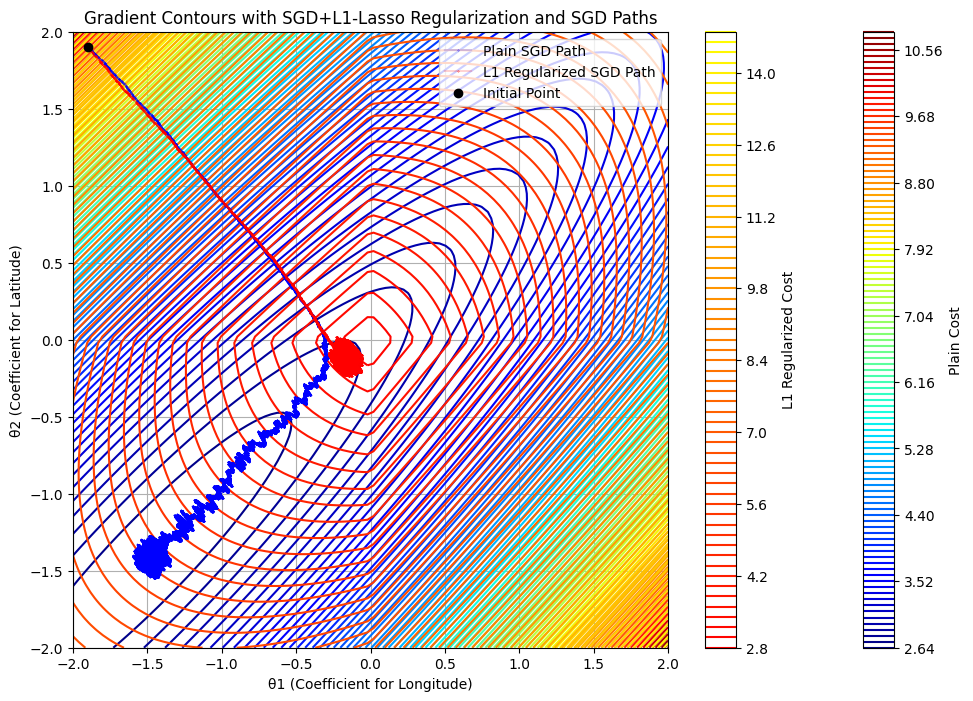

In [2]:
# Gradient Descent Implementation
def simple_gradient_descent(X, y, initial_theta, learning_rate, epochs, compute_cost_func, lambda_=0):
    theta = initial_theta
    theta_history = [theta.copy()]
    m = len(y)
    for _ in range(epochs):
        predictions = X @ theta
        gradients = (X.T @ (predictions - y)) / m  # Gradient of plain cost
        # Add regularization terms to gradients
        if compute_cost_func == compute_cost_L1:
            gradients += lambda_ * np.sign(theta)  # L1 regularization gradient
        elif compute_cost_func == compute_cost_L2:
            gradients += lambda_ * theta           # L2 regularization gradient
        # Update parameters
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())
    return theta, theta_history

# Stochastic Gradient Descent Implementation
def stochastic_gradient_descent(X, y, initial_theta, learning_rate, epochs, compute_cost_func, lambda_=0):
    theta = initial_theta.copy()  # Ensure theta is not modified in place
    theta_history = [theta.copy()]
    m, n = X.shape  # m = number of samples, n = number of features
    for _ in range(epochs):
        for i in range(m):
            random_idx = np.random.randint(m)  # Random sample index
            xi = X[random_idx:random_idx+1]    # Select one sample (reshape for matrix multiplication)
            yi = y[random_idx:random_idx+1]    # Select corresponding target
            # Compute gradient
            predictions = xi @ theta
            gradients = xi.T * (predictions - yi)  # Shape: (n_features, 1)
            gradients = gradients.flatten()       # Flatten to (n_features,) for easier manipulation
            # Add regularization terms to gradients
            if compute_cost_func == compute_cost_L1:
                gradients += lambda_ * np.sign(theta)  # L1 regularization gradient
            elif compute_cost_func == compute_cost_L2:
                gradients += lambda_ * theta           # L2 regularization gradient
            # Update parameters
            theta -= learning_rate * gradients
            theta_history.append(theta.copy())
    return theta, theta_history

##########################
# Initialize parameters
initial_theta = np.array([-1.9, 1.9])  # Starting point in parameter space
learning_rate = 5e-4
epochs = 50

# Compute gradient descent paths
theta_plain, history_plain = stochastic_gradient_descent(X_train, y_train, initial_theta, learning_rate, epochs, compute_cost)
theta_L1, history_L1 = stochastic_gradient_descent(X_train, y_train, initial_theta, learning_rate, epochs, compute_cost_L1, lambda_=0.1)

# Convert histories to arrays for plotting
history_plain = np.array(history_plain)
history_L1 = np.array(history_L1)

# Plot contours and gradient paths
plt.figure(figsize=(12, 8))

# Contours for cost functions
contour_plain = plt.contour(theta_1_grid, theta_2_grid, cost_grid_plain, levels=128, cmap="jet", alpha=1.0)
plt.colorbar(contour_plain, label="Plain Cost")
contour_L1 = plt.contour(theta_1_grid, theta_2_grid, cost_grid_L1, levels=64, cmap="autumn", alpha=1.0)
plt.colorbar(contour_L1, label="L1 Regularized Cost")
# contour_L2 = plt.contour(theta_1_grid, theta_2_grid, cost_grid_L2, levels=15, cmap="Greens", alpha=0.6)
# plt.colorbar(contour_L2, label="L2 Regularized Cost")

# Plot gradient descent paths
plt.plot(history_plain[:, 0], history_plain[:, 1], 'o-', linewidth=0.25, color='blue', markersize=0.25, label="Plain SGD Path")
plt.plot(history_L1[:, 0], history_L1[:, 1], 'o-', linewidth=0.25, color='red', markersize=0.25, label="L1 Regularized SGD Path")
# plt.plot(history_L2[:, 0], history_L2[:, 1], 'o-', color='green', markersize=4, label="L2 Regularized GD Path")

# Highlight initial point
plt.scatter(initial_theta[0], initial_theta[1], color='black', label="Initial Point", zorder=5)

# Add labels, legend, and title
plt.title("Gradient Contours with SGD+L1-Lasso Regularization and SGD Paths")
plt.xlabel("θ1 (Coefficient for Longitude)")
plt.ylabel("θ2 (Coefficient for Latitude)")
plt.legend()
plt.grid()
plt.show()


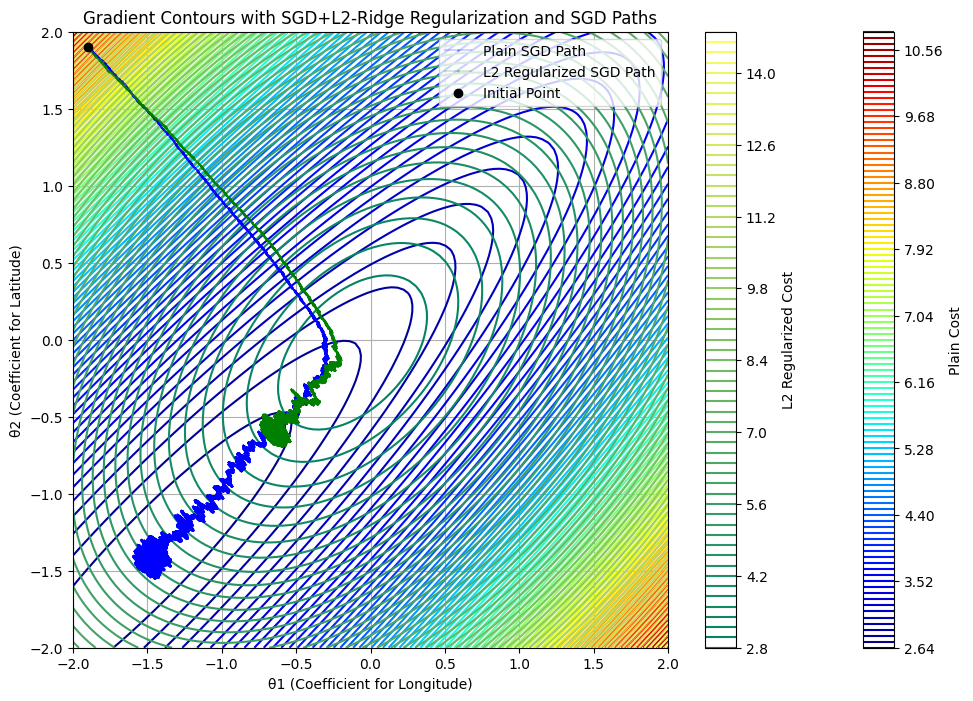

In [3]:
# Compute gradient descent paths
theta_L2, history_L2 = stochastic_gradient_descent(X_train, y_train, initial_theta, learning_rate, epochs, compute_cost_L2, lambda_=0.1)

# Convert histories to arrays for plotting
history_L2 = np.array(history_L2)

# Plot contours and gradient paths
plt.figure(figsize=(12, 8))

# Contours for cost functions
contour_plain = plt.contour(theta_1_grid, theta_2_grid, cost_grid_plain, levels=128, cmap="jet", alpha=1.0)
plt.colorbar(contour_plain, label="Plain Cost")
contour_L2 = plt.contour(theta_1_grid, theta_2_grid, cost_grid_L2, levels=64, cmap="summer", alpha=1.0)
plt.colorbar(contour_L2, label="L2 Regularized Cost")

# Plot gradient descent paths
plt.plot(history_plain[:, 0], history_plain[:, 1], 'o-', linewidth=0.25, color='blue', markersize=0.25, label="Plain SGD Path")
plt.plot(history_L2[:, 0], history_L2[:, 1], 'o-', linewidth=0.25, color='green', markersize=0.25, label="L2 Regularized SGD Path")

# Highlight initial point
plt.scatter(initial_theta[0], initial_theta[1], color='black', label="Initial Point", zorder=5)

# Add labels, legend, and title
plt.title("Gradient Contours with SGD+L2-Ridge Regularization and SGD Paths")
plt.xlabel("θ1 (Coefficient for Longitude)")
plt.ylabel("θ2 (Coefficient for Latitude)")
plt.legend()
plt.grid()
plt.show()

----
##### Multiple-convex (Plateau) and an only global minimum

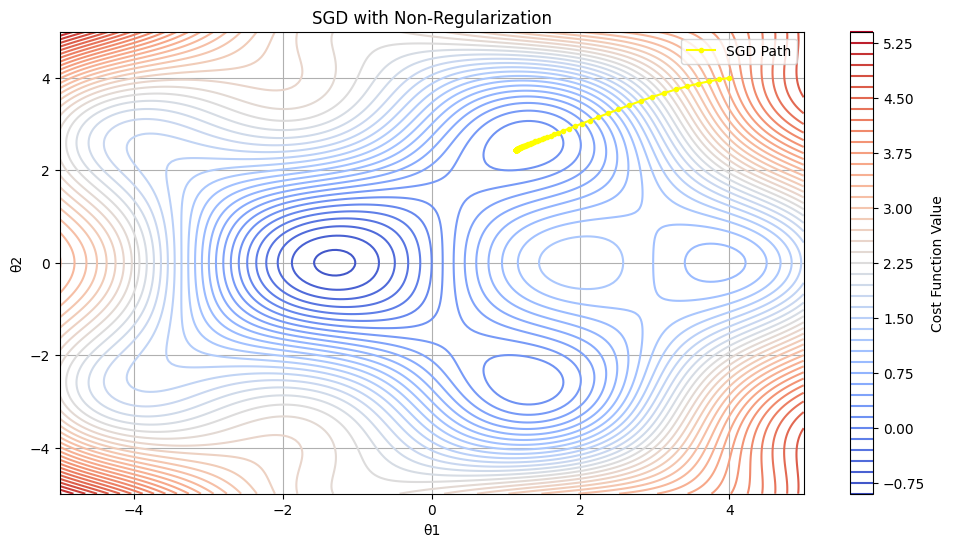

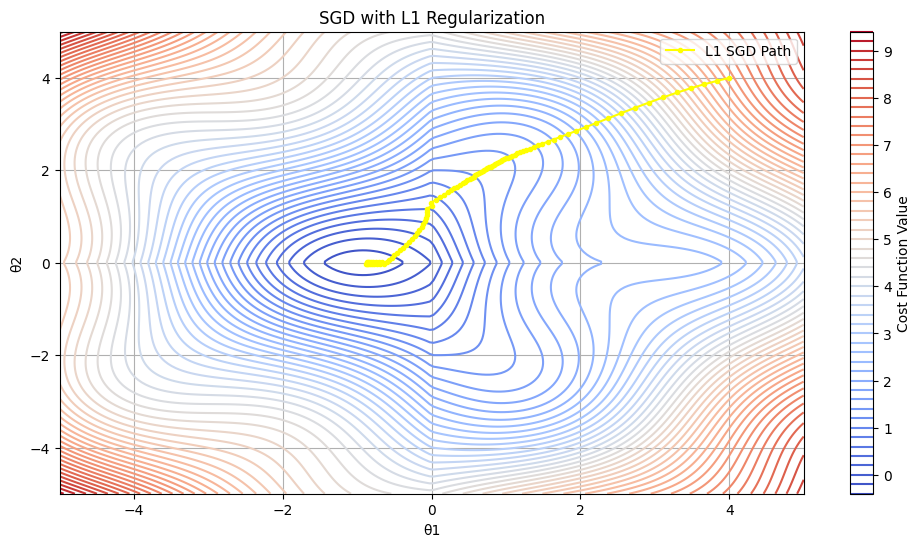

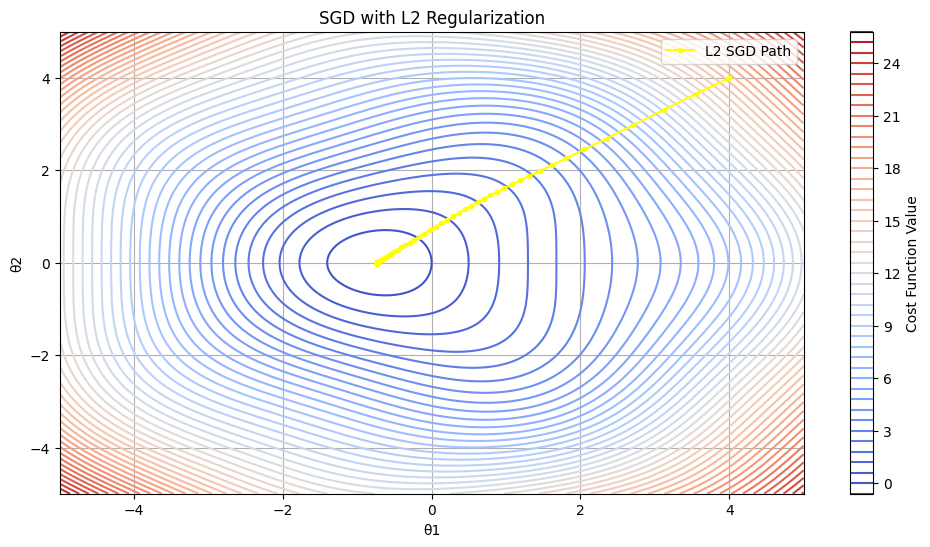

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Custom cost functions without and with L1 and L2 regularization
def custom_cost_function(theta):
    theta_1, theta_2 = theta
    cost = np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2)
    return cost

def custom_cost_function_L1(theta, lambda_=0.1):
    theta_1, theta_2 = theta
    cost = np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2) + lambda_ * (np.abs(theta_1) + np.abs(theta_2))
    return cost

def custom_cost_function_L2(theta, lambda_=0.1):
    theta_1, theta_2 = theta
    cost = np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2) + lambda_ * (theta_1**2 + theta_2**2)
    return cost

# Gradients of the custom cost functions
def custom_gradients(theta):
    theta_1, theta_2 = theta
    grad_theta_1 = np.cos(theta_1) * np.cos(theta_2) + 0.2 * theta_1
    grad_theta_2 = -np.sin(theta_1) * np.sin(theta_2) + 0.2 * theta_2
    return np.array([grad_theta_1, grad_theta_2])

def custom_gradients_L1(theta, lambda_=0.1):
    theta_1, theta_2 = theta
    grad_theta_1 = np.cos(theta_1) * np.cos(theta_2) + 0.2 * theta_1 + lambda_ * np.sign(theta_1)   # grad of loss + grad of reg
    grad_theta_2 = -np.sin(theta_1) * np.sin(theta_2) + 0.2 * theta_2 + lambda_ * np.sign(theta_2)
    return np.array([grad_theta_1, grad_theta_2])

def custom_gradients_L2(theta, lambda_=0.1):
    theta_1, theta_2 = theta
    grad_theta_1 = np.cos(theta_1) * np.cos(theta_2) + 0.2 * theta_1 + 2 * lambda_ * theta_1
    grad_theta_2 = -np.sin(theta_1) * np.sin(theta_2) + 0.2 * theta_2 + 2 * lambda_ * theta_2
    return np.array([grad_theta_1, grad_theta_2])

# Stochastic Gradient Descent
def stochastic_gradient_descent_regularized(initial_theta, learning_rate, epochs, gradients_func, lambda_, reg = 'L1'):
    theta = np.array(initial_theta)
    theta_history = [theta.copy()]

    for epoch in range(epochs):
        if reg in {'L1', 'L2'}:
          gradients = gradients_func(theta, lambda_)
        else:
          gradients = gradients_func(theta)
        theta -= learning_rate * gradients
        theta_history.append(theta.copy())

    return theta, theta_history

#######################
# Initialize parameters
initial_theta = [4.0, 4.0]
learning_rate = 0.1
epochs = 100
lambda_ = 0.4  # Regularization strength

# Perform SGD with L1 and L2 regularization
_, theta_history = stochastic_gradient_descent_regularized(initial_theta, learning_rate, epochs, custom_gradients_L1, lambda_=0., reg=None)
_, theta_history_L1 = stochastic_gradient_descent_regularized(initial_theta, learning_rate, epochs, custom_gradients_L1, lambda_, reg='L1')
_, theta_history_L2 = stochastic_gradient_descent_regularized(initial_theta, learning_rate, epochs, custom_gradients_L2, lambda_, reg='L2')

# Generate grid for plotting the custom cost functions
theta_1_vals = np.linspace(-5, 5, 200)
theta_2_vals = np.linspace(-5, 5, 200)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)

# Compute cost grids
cost_grid = np.array([[custom_cost_function((t1, t2)) for t1, t2 in zip(row1, row2)]
                         for row1, row2 in zip(theta_1_grid, theta_2_grid)])
cost_grid_L1 = np.array([[custom_cost_function_L1((t1, t2), lambda_) for t1, t2 in zip(row1, row2)]
                         for row1, row2 in zip(theta_1_grid, theta_2_grid)])
cost_grid_L2 = np.array([[custom_cost_function_L2((t1, t2), lambda_) for t1, t2 in zip(row1, row2)]
                         for row1, row2 in zip(theta_1_grid, theta_2_grid)])

# Plot contours for non-regularization
plt.figure(figsize=(12, 6))
plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.plot(np.array(theta_history)[:, 0], np.array(theta_history)[:, 1], 'o-', color='yellow', label='SGD Path', markersize=3)
plt.title('SGD with Non-Regularization')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.colorbar(label='Cost Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot contours for L1 regularization
plt.figure(figsize=(12, 6))
plt.contour(theta_1_grid, theta_2_grid, cost_grid_L1, levels=50, cmap='coolwarm')
plt.plot(np.array(theta_history_L1)[:, 0], np.array(theta_history_L1)[:, 1], 'o-', color='yellow', label='L1 SGD Path', markersize=3)
plt.title('SGD with L1 Regularization')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.colorbar(label='Cost Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot contours for L2 regularization
plt.figure(figsize=(12, 6))
plt.contour(theta_1_grid, theta_2_grid, cost_grid_L2, levels=50, cmap='coolwarm')
plt.plot(np.array(theta_history_L2)[:, 0], np.array(theta_history_L2)[:, 1], 'o-', color='yellow', label='L2 SGD Path', markersize=3)
plt.title('SGD with L2 Regularization')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.colorbar(label='Cost Function Value')
plt.legend()
plt.grid(True)
plt.show()


----
PyTorch example

In [5]:
# @title Option1: L2-regularization (weight_decay) included into optimizer
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score

# Step 1: Load the California Housing Dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert data to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Make sure y is a column vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create DataLoader for batching
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Step 3: Define a simple neural network model
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(in_features=8, out_features=64)  # 8 features in the California dataset
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=1)  # 1 output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 4: Initialize the model, loss function, and optimizer
model = ANNModel()

# L2 Regularization is included in the optimizer (weight_decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)  # weight_decay is L2 regularization

criterion = nn.MSELoss()  # Mean Squared Error for regression

# Step 5: Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss for this batch
        running_loss += loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())

    # Print average loss and metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, R²: {r2:.4f}")

# Step 6: Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0.0
    all_preds = []
    all_targets = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())
    print(f"Test Loss: {test_loss / len(test_loader)}, R²: {r2:.4f}")


Epoch [10/1000], Loss: 0.3381, R²: 0.7471
Epoch [20/1000], Loss: 0.3034, R²: 0.7730
Epoch [30/1000], Loss: 0.2829, R²: 0.7883
Epoch [40/1000], Loss: 0.2761, R²: 0.7935
Epoch [50/1000], Loss: 0.2709, R²: 0.7973
Epoch [60/1000], Loss: 0.2641, R²: 0.8024
Epoch [70/1000], Loss: 0.2619, R²: 0.8041
Epoch [80/1000], Loss: 0.2575, R²: 0.8074
Epoch [90/1000], Loss: 0.2545, R²: 0.8096
Epoch [100/1000], Loss: 0.2551, R²: 0.8092
Epoch [110/1000], Loss: 0.2503, R²: 0.8127
Epoch [120/1000], Loss: 0.2507, R²: 0.8125
Epoch [130/1000], Loss: 0.2495, R²: 0.8134
Epoch [140/1000], Loss: 0.2499, R²: 0.8130
Epoch [150/1000], Loss: 0.2486, R²: 0.8141
Epoch [160/1000], Loss: 0.2455, R²: 0.8164
Epoch [170/1000], Loss: 0.2480, R²: 0.8145
Epoch [180/1000], Loss: 0.2447, R²: 0.8170
Epoch [190/1000], Loss: 0.2466, R²: 0.8155
Epoch [200/1000], Loss: 0.2639, R²: 0.8026
Epoch [210/1000], Loss: 0.2457, R²: 0.8162
Epoch [220/1000], Loss: 0.2439, R²: 0.8175
Epoch [230/1000], Loss: 0.2418, R²: 0.8191
Epoch [240/1000], Lo

In [6]:
# @title Option2: L1- or L2-regularization added on to loss combination

# Step 4: Re-initialize the model, loss function, and optimizer
model = ANNModel()

optimizer = optim.Adam(model.parameters(), lr=0.001)  # No weight_decay here

criterion = nn.MSELoss()  # Mean Squared Error for regression

# Regularization parameters
lambda_l1 = 0.1  # L1 regularization strength
lambda_l2 = 0.0001   # L2 regularization strength

# Step 5: Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the base loss (MSE)
        loss = criterion(outputs, targets)

        # L2 Regularization (weight decay term)
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())

        # L1 Regularization (sparsity term)
        l1_norm = sum(p.abs().sum() for p in model.parameters())

        # Total loss with L1 and L2 regularization
        total_loss = loss \
        + lambda_l2 * l2_norm \
        # + lambda_l1 * l1_norm

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        # Accumulate loss for this batch
        running_loss += total_loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())

    # Print average loss and metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, R²: {r2:.4f}")

# Step 6: Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0.0
    all_preds = []
    all_targets = []

    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # L2 Regularization (weight decay term)
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())

        # L1 Regularization (sparsity term)
        l1_norm = sum(p.abs().sum() for p in model.parameters())

        # Total test loss with L1 and L2 regularization
        total_loss = loss \
        + lambda_l2 * l2_norm \
        # + lambda_l1 * l1_norm

        test_loss += total_loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())
    print(f"Test Loss: {test_loss / len(test_loader)}, R²: {r2:.4f}")


Epoch [10/1000], Loss: 0.3380, R²: 0.7526
Epoch [20/1000], Loss: 0.3075, R²: 0.7765
Epoch [30/1000], Loss: 0.2901, R²: 0.7900
Epoch [40/1000], Loss: 0.2850, R²: 0.7941
Epoch [50/1000], Loss: 0.2779, R²: 0.7997
Epoch [60/1000], Loss: 0.2718, R²: 0.8046
Epoch [70/1000], Loss: 0.2689, R²: 0.8070
Epoch [80/1000], Loss: 0.2658, R²: 0.8096
Epoch [90/1000], Loss: 0.2629, R²: 0.8121
Epoch [100/1000], Loss: 0.2590, R²: 0.8153
Epoch [110/1000], Loss: 0.2580, R²: 0.8164
Epoch [120/1000], Loss: 0.2551, R²: 0.8188
Epoch [130/1000], Loss: 0.2521, R²: 0.8213
Epoch [140/1000], Loss: 0.2507, R²: 0.8225
Epoch [150/1000], Loss: 0.2509, R²: 0.8225
Epoch [160/1000], Loss: 0.2466, R²: 0.8259
Epoch [170/1000], Loss: 0.2469, R²: 0.8259
Epoch [180/1000], Loss: 0.2447, R²: 0.8276
Epoch [190/1000], Loss: 0.2431, R²: 0.8290
Epoch [200/1000], Loss: 0.2420, R²: 0.8300
Epoch [210/1000], Loss: 0.2418, R²: 0.8302
Epoch [220/1000], Loss: 0.2407, R²: 0.8313
Epoch [230/1000], Loss: 0.2405, R²: 0.8315
Epoch [240/1000], Lo

In [7]:
# @title Non-regularization added on to loss combination

# Step 4: Re-initialize the model, loss function, and optimizer
model = ANNModel()

optimizer = optim.Adam(model.parameters(), lr=0.001)  # No weight_decay here

criterion = nn.MSELoss()  # Mean Squared Error for regression

# Step 5: Train the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    for inputs, targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the base loss (MSE)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate loss for this batch
        running_loss += loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())

    # Print average loss and metrics every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}, R²: {r2:.4f}")

# Step 6: Evaluate the model
model.eval()
with torch.no_grad():
    test_loss = 0.0
    all_preds = []
    all_targets = []

    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        # Store predictions and targets for accuracy metrics
        all_preds.append(outputs.detach().numpy())
        all_targets.append(targets.detach().numpy())

    # Convert lists of predictions and targets to numpy arrays
    all_preds = torch.cat([torch.tensor(pred) for pred in all_preds])
    all_targets = torch.cat([torch.tensor(target) for target in all_targets])

    # Calculate R² score
    r2 = r2_score(all_targets.numpy(), all_preds.numpy())
    print(f"Test Loss: {test_loss / len(test_loader)}, R²: {r2:.4f}")


Epoch [10/1000], Loss: 0.3311, R²: 0.7523
Epoch [20/1000], Loss: 0.2922, R²: 0.7814
Epoch [30/1000], Loss: 0.2767, R²: 0.7930
Epoch [40/1000], Loss: 0.2657, R²: 0.8012
Epoch [50/1000], Loss: 0.2589, R²: 0.8063
Epoch [60/1000], Loss: 0.2541, R²: 0.8099
Epoch [70/1000], Loss: 0.2496, R²: 0.8133
Epoch [80/1000], Loss: 0.2461, R²: 0.8159
Epoch [90/1000], Loss: 0.2424, R²: 0.8186
Epoch [100/1000], Loss: 0.2396, R²: 0.8207
Epoch [110/1000], Loss: 0.2379, R²: 0.8220
Epoch [120/1000], Loss: 0.2341, R²: 0.8249
Epoch [130/1000], Loss: 0.2328, R²: 0.8259
Epoch [140/1000], Loss: 0.2304, R²: 0.8276
Epoch [150/1000], Loss: 0.2295, R²: 0.8283
Epoch [160/1000], Loss: 0.2264, R²: 0.8306
Epoch [170/1000], Loss: 0.2245, R²: 0.8321
Epoch [180/1000], Loss: 0.2218, R²: 0.8340
Epoch [190/1000], Loss: 0.2200, R²: 0.8354
Epoch [200/1000], Loss: 0.2201, R²: 0.8354
Epoch [210/1000], Loss: 0.2165, R²: 0.8381
Epoch [220/1000], Loss: 0.2144, R²: 0.8396
Epoch [230/1000], Loss: 0.2120, R²: 0.8414
Epoch [240/1000], Lo